# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

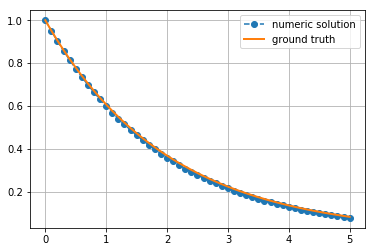

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

$ \frac{u_{k+1} - u_{k}}{dt_{k}} = \lambda u_{k}   =>    u_{k+1} = (1 + dt\lambda) u_{k} $ - отсюда понятно, почему начинаются 'осцилляции' при больших шагах

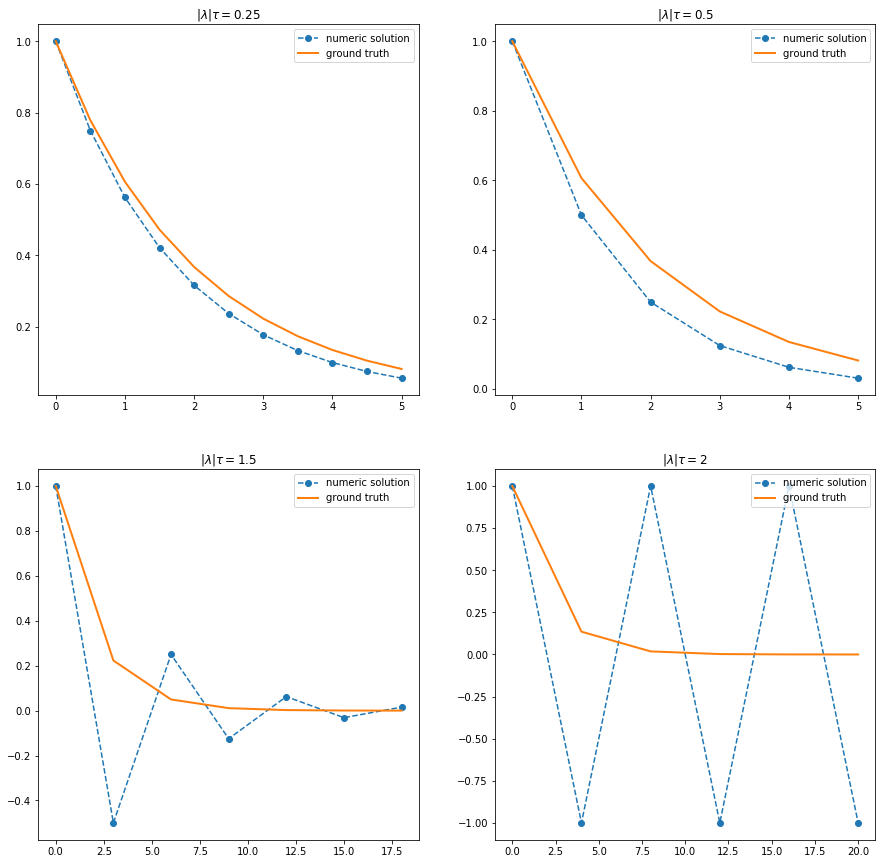

In [4]:
# ... ENTER YOUR CODE HERE ...
step = np.array([0.5, 1, 3, 4])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))

t1, u1 = euler_solve(lam, u0=1.0, T=5, dt=step[0])
t2, u2 = euler_solve(lam, u0=1.0, T=5, dt=step[1])            # считаем решения для разных значений шага
t3, u3 = euler_solve(lam, u0=1.0, T=20, dt=step[2])
t4, u4 = euler_solve(lam, u0=1.0, T=20, dt=step[3])

ax[0,0].plot(t1, u1, 'o--', label='numeric solution')
ax[0,0].plot(t1, np.exp(lam*t1), '-', lw=2, label='ground truth')
ax[0,0].set(title = r'$|\lambda| \tau = 0.25$')
ax[0,0].legend()

ax[0,1].plot(t2, u2, 'o--', label='numeric solution')
ax[0,1].plot(t2, np.exp(lam*t2), '-', lw=2, label='ground truth')    # строим для них графики
ax[0,1].set(title = r'$|\lambda| \tau = 0.5$')
ax[0,1].legend()

ax[1,0].plot(t3, u3, 'o--', label='numeric solution')
ax[1,0].plot(t3, np.exp(lam*t3), '-', lw=2, label='ground truth')
ax[1,0].set(title = r'$|\lambda| \tau = 1.5$')
ax[1,0].legend()

ax[1,1].plot(t4, u4, 'o--', label='numeric solution')
ax[1,1].plot(t4, np.exp(lam*t4), '-', lw=2, label='ground truth')
ax[1,1].set(title = r'$|\lambda| \tau = 2$')
ax[1,1].legend()


plt.show()

При $ 1 < |\lambda| \tau < 2 $, начинаются осцилляции вокруг нуля, но они еще стабильны; при >= 2 решение уже не сойдется

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

$ \frac{u_{k+1} - u_{k}}{dt_{k}} = \lambda u_{k+1}   =>   u_{k+1} (1 - dt \lambda) = u_{k}  $ - можно ожидать чего-то хорошего для любого ненулевого $dt$ при $\lambda < 0$, в отличии от explicit scheme

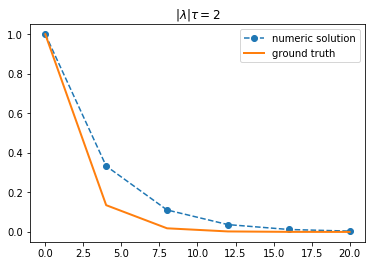

In [5]:
# ... ENTER YOUR CODE AND DISCUSSION HERE ...

def Euler_implicit(lam, u0, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt # ось времени
    u = np.zeros(t.shape[0])
    u[0] = u0
    for i in range(N):
        u[i + 1] = u[i] / (1 - lam * dt)  # по формуле перед кодом считаем каждое следующее значение
    
    return t, u

t5, u5 = Euler_implicit(lam, u0=1.0, T=20, dt=step[3]) #оставлю только |\lambda| \tau = 2, чтобы показать что такая схема стабильнее и не начинает прыгать
plt.plot(t5, u5, 'o--', label='numeric solution')
plt.plot(t5, np.exp(lam*t5), '-', lw=2, label='ground truth')
plt.title(r'$|\lambda| \tau = 2$')
plt.legend()
plt.show()

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

$\mathbf{u} = (x, y)^T$

$\begin{cases}
\frac{x_{k+1} - x_{k}}{dt} = f(x_{k}, y_{k}) \\
\frac{y_{k+1} - y_{k}}{dt} = g(x_{k}, y_{k})
\end{cases}$

$\begin{cases}
x_{k+1} = x_{k} + dt * f(x_{k}, y_{k}) \\
y_{k+1} = y_{k} + dt * g(x_{k}, y_{k})
\end{cases}$

=> $\mathbf{u_{k+1}} = (1 + dt * A) \mathbf{u_{k}} $

In [6]:
# ... ENTER YOUR CODE HERE ...

def Euler_biexplicit(u0, A, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt # ось времени
    
    u = np.zeros((u0.shape[0], N+1))  # в принципе, код работает для любой размерности задачи
    u[:, 0] = u0
    
    for i in range(N):
        u[:, i+1] = u[:, i] + dt * A @ u[:, i]
    
    return t, u

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stiff.

(20% of the grade)

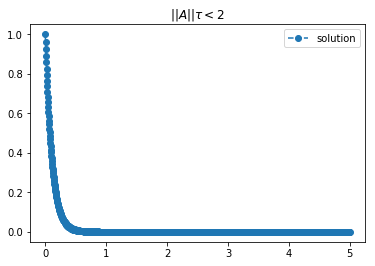

Собственные значения A:  [  -9.34647667 -499.65352333]
Норма матрицы A:  500.22494939776846
Самый большой шаг:  0.004002773735447413


In [24]:
# ... ENTER YOUR CODE HERE ...
u0 = np.array([1, 0])
A = np.array([[-10, 10], [32, -499]])

                                           # при шаге 0.01 метод не стабилен
t6, u6 = Euler_biexplicit(u0, A, 5, 4e-3)  # шаг 4e-3 лежит примерно равен 'критическому', при больших шагах все начинает расходиться;
                                           # как увидим из бОльшего собственного значения, шаг 0.01 слишком большой
plt.plot(t6, u6[0], 'o--', label='solution')
plt.title(r'$||A|| \tau < 2$')   #примерно
plt.legend()
plt.show()

print("Собственные значения A: ", np.linalg.eigvals(A))
print("Норма матрицы A: ", np.linalg.norm(A))
print("Самый большой шаг: ", 2/np.max(np.abs(np.linalg.eigvals(A))))

Аналогичные рассуждения, как для $ |\lambda| \tau $, но теперь для $ ||\mathbf{A}|| * dt $, аналогичные промежутки сходимости/расходимости решения, но правильнее рассуждать в терминах собственных значений, и будет система в которой $dt < \frac{2}{\lambda} $, для каждого $\lambda$, то есть нужно просто выбрать большее из собственных значений и им ограничивать $dt$

Соответственно система жесткая, т.к. одна из $\lambda$ сильно больше другой(примерно в 50 раз), сильно ограничивает выбор шага

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

$\begin{cases}
x_{k+1} = x_{k} + dt * f(x_{k+1}, y_{k+1}) \\
y_{k+1} = y_{k} + dt * g(x_{k+1}, y_{k+1})
\end{cases} $

$ (1 - dt * A) u_{k+1} = u_{k} $

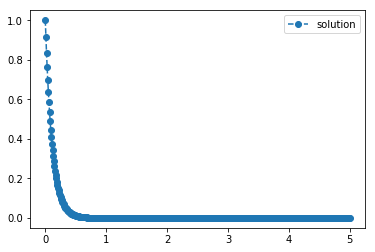

In [8]:
# ... ENTER YOUR CODE HERE ...
def Euler_biimplicit(u0, A, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt # ось времени
    M = np.eye(u0.shape[0]) - A*dt
    
    u = np.zeros((u0.shape[0], N+1))
    u[:, 0] = u0
    for i in range(N):
        u[:, i+1] = np.linalg.solve(M, u[:, i])
    return t, u

t7, u7 = Euler_biimplicit(u0, A, 5, 0.01)

plt.plot(t7, u7[0], 'o--', label='solution')
plt.legend()
plt.show()

Для этого метода шаг в 0.01 стабилен, опять же в аналогии с одномерным диффуром, для любого $dt > 0$ следующее значение вектора будет по модулю меньше предыдущего(для затухающих решений)

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

В общем нужно просто заменить $\frac{du}{dt}$ на $p$, и получится система:

$$
\begin{cases}
\frac{du}{dt} = p \\
\frac{dp}{dt} = -\omega^2 u
\end{cases}
$$

$$
\frac{\mathbf{y}_{k+1} - \mathbf{y}_{k}}{dt} = \mathbf{B} \mathbf{y}_{k}, \mathbf{y} = (u, p)^T
$$

$$
\mathbf{y}_{k+1} = \mathbf{A} \mathbf{y}_{k}
$$

$$
\mathbf{A} = \begin{bmatrix} 1 & dt \\ -dt*\omega^2 & 1 \end{bmatrix}
$$

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

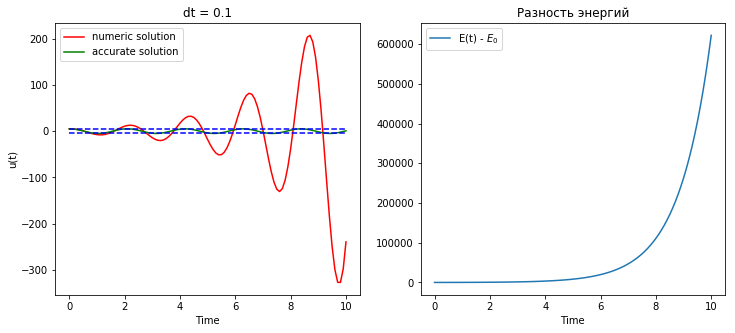

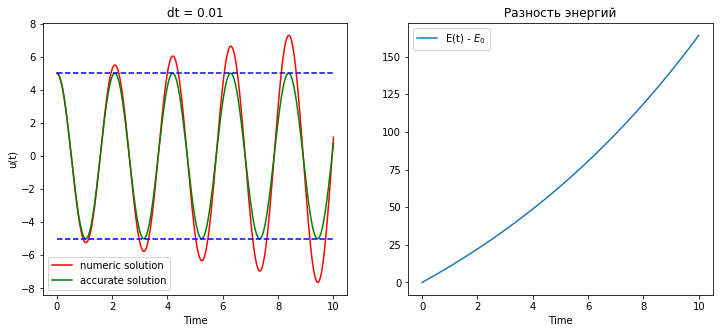

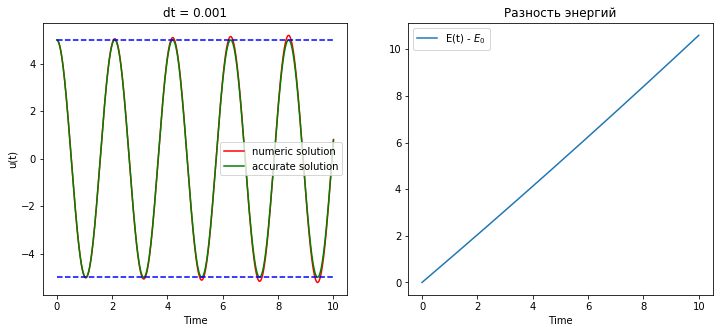

In [15]:
# ... ENTER YOUR CODE HERE ...
omega = 3

u0 = 5
p0 = 0
E = p0**2 / 2 + (omega**2 * u0**2)/2

def dsolver(u0, p0, omega, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt # ось времени
    A = np.array([[1, dt], [-dt * omega**2, 1]])   # матрица от времени не зависит, шаги одинаковые, считаем вне цикла
    
    y = np.zeros((2, N+1)) # вектор (u, p)
    y[:, 0] = (u0, p0)
    
    for i in range(N):
        y[:, i+1] = A @ y[:, i]
    
    return t, y

steps = [1e-1, 1e-2, 1e-3]

for dt in steps:
    T, Y = dsolver(u0, p0, omega, 10, dt)
    true_u = u0 * np.cos(omega*T)
    
    fig, ax = plt.subplots(ncols=2, figsize=(12,5))
    
    ax[0].plot(T, Y[0], label='numeric solution', c='r')
    ax[0].plot(T, true_u, label='accurate solution', c='g')       #строим численное и точное решения
    ax[0].set(title=f'dt = {dt}', xlabel='Time', ylabel='u(t)')
    
    dE = Y[1]**2 / 2 + (omega**2 * Y[0]**2)/2 - E      # считаем разность между энергией в момент t, и начальной энергией
    ax[1].plot(T, dE, label='E(t) - $E_0$')
    ax[1].set(title='Разность энергий', xlabel='Time')
    
    ax[0].plot([0,10], [u0, u0], '--', c='b')    #линии между которыми идут осцилляции в точном решении
    ax[0].plot([0,10], [-u0, -u0], '--', c='b')
    
    ax[0].legend()
    ax[1].legend()
    plt.show()


Энергия не сохраняется, решение расходится

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

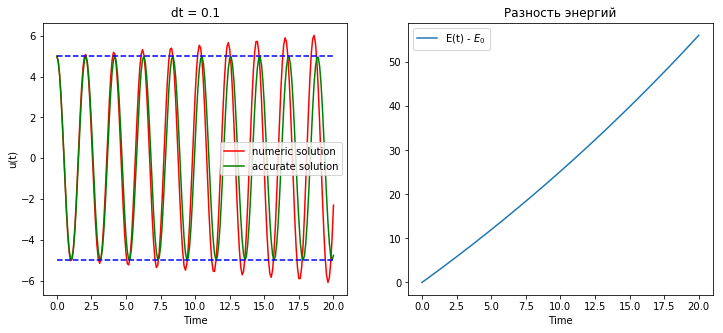

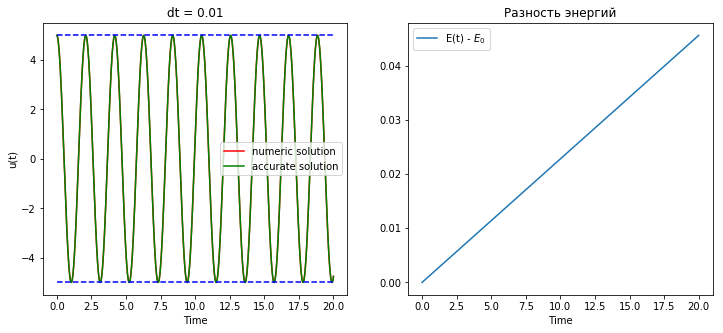

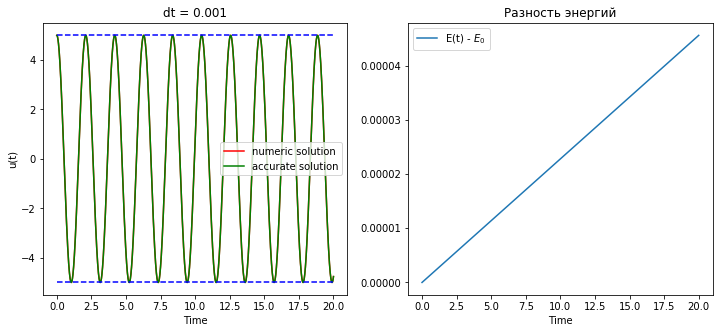

In [14]:
# ... ENTER YOUR CODE HERE ...

def RK_second(u0, p0, omega, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt # ось времени
    A = np.array([[0, dt/2], [-dt/2 * omega**2, 0]])   # в матрице уже учтен 'шаг' h/2
    
    y = np.zeros((2, N+1)) # вектор (u, p)
    y[:, 0] = (u0, p0)
    
    inter = np.zeros(2) # переменная, в которой будут находиться промежуточные шаги
    
    for i in range(N):
        inter = y[:, i] + A @ y[:, i]   #Этот шаг похож на explicit
        
        y[:, i+1] = y[:, i] + 2*A @ inter   # 2 шаг, 2 появляется, чтобы получилось dt, а не dt/2
        
    return t, y

for dt in steps:
    T, Y = RK_second(u0, p0, omega, 20, dt)
    true_u = u0 * np.cos(omega*T)
    
    fig, ax = plt.subplots(ncols=2, figsize=(12,5))
    
    ax[0].plot(T, Y[0], label='numeric solution', c='r')
    ax[0].plot(T, true_u, label='accurate solution', c='g')       #строим численное и точное решения
    ax[0].set(title=f'dt = {dt}', xlabel='Time', ylabel='u(t)')
    
    dE = Y[1]**2 / 2 + (omega**2 * Y[0]**2)/2 - E      # считаем разность между энергией в момент t, и начальной энергией
    ax[1].plot(T, dE, label='E(t) - $E_0$')
    ax[1].set(title='Разность энергий', xlabel='Time')
    
    ax[0].plot([0,20], [u0, u0], '--', c='b')    #линии между которыми идут осцилляции в точном решении
    ax[0].plot([0,20], [-u0, -u0], '--', c='b')
    
    ax[0].legend()
    ax[1].legend()
    plt.show()

Конечно и тут энергия не сохраняется, но растет она заметно медленнее, чем в explicit Euler методе